In [90]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

import statsmodels.api as sm

In [15]:
from rdd import rdd


In [98]:
#Working example, however with no visualization 

Y = practice_data['Units']
X = practice_data['Rank']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
#ax = practice_data.plot.scatter(x="Rank", y="Units", color="C0")
#practice_data.assign(predictions=model.fittedvalues).plot(x="Rank", y="Units", ax=ax, color="C1")
#plt.title("Regression Discontinuity");
model.summary()


/Users/danieltom/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Units   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     63.30
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           6.33e-14
Time:                        12:07:14   Log-Likelihood:                -2260.6
No. Observations:                 250   AIC:                             4525.
Df Residuals:                     248   BIC:                             4532.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2647.0287    260.541     10.160      0.000    2133.874    3160.184
Rank         -14.3183      1.800     -7.956      0.000     -17.863     -10.774
==============================================================================
Omnibus:                      343.715   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31602.880
Skew:                           6.323   Prob(JB):                         0.00
Kurtosis:                      56.609   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
practice_data = pd.read_csv('/Users/danieltom/Desktop/data/DataSet(1).csv')

In [13]:
practice_data

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger
...,...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,NaN,129,-10.4%,18,-5.3%,NaN,Varied Menu
246,247,PDQ,NaN,127,-5.5%,56,-11.1%,NaN,Chicken
247,248,Lupe Tortilla,NaN,127,12.1%,25,8.7%,NaN,Mexican
248,249,Cook-Out Restaurant,NaN,126,10.1%,270,7.1%,NaN,Burger


In [31]:
#working example
bandwidth_opt = rdd.optimal_bandwidth(practice_data['Sales'], practice_data['Units'], cut=100)
print("Optimal bandwidth:", bandwidth_opt)

Optimal bandwidth: 91.47406888690907


In [32]:
data_rdd = rdd.truncated_data(practice_data, 'Units', bandwidth_opt, cut=100)


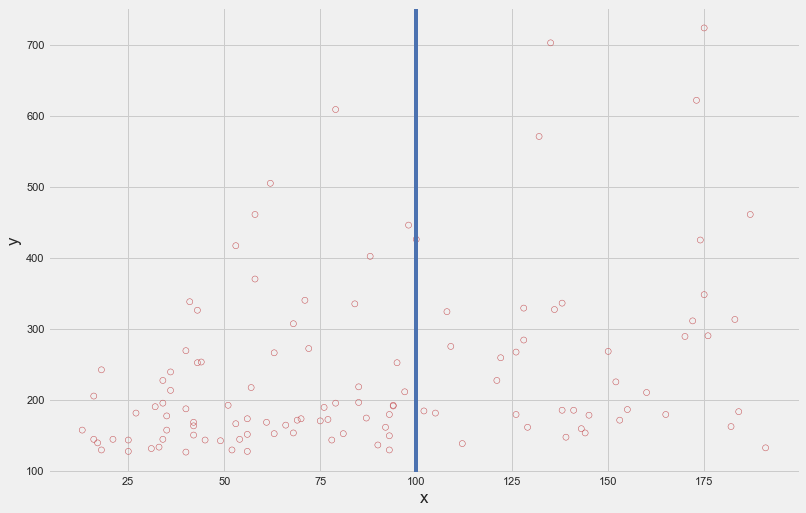

In [34]:
plt.figure(figsize=(12, 8))
plt.scatter(data_rdd['Units'], data_rdd['Sales'], facecolors='none', edgecolors='r')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x=100, color='b')
plt.show()
plt.close()

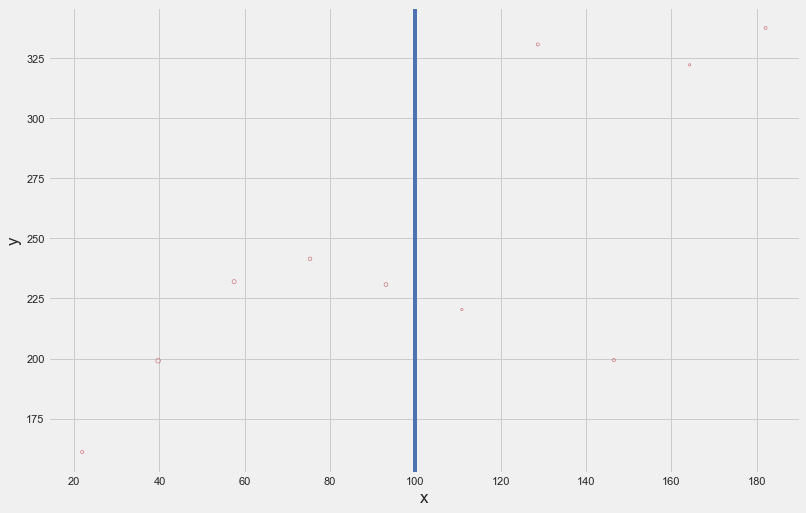

In [53]:
data_binned = rdd.bin_data(data_rdd, 'Sales', 'Units', 10)

plt.figure(figsize=(12, 8))
plt.scatter(data_binned['Units'], data_binned['Sales'],
    s = data_binned['n_obs'], facecolors='none', edgecolors='r')
plt.axvline(x=100, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.close()

#y = sales
#x = units

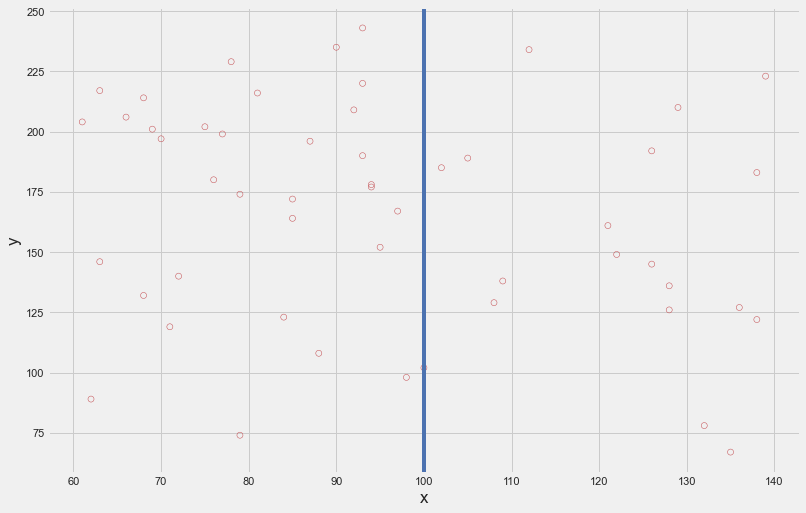

In [89]:
#working on an example to check diff parameters at once

#find diff ways to calculate bandwidth?

#for i in practice_data.loc[:, practice_data.columns != 'Sales']: 
bandwidth_opt = rdd.optimal_bandwidth(practice_data['Rank'], practice_data['Units'].astype(int), cut=100)
data_rdd = rdd.truncated_data(practice_data, 'Units', bandwidth_opt, cut=100)
plt.figure(figsize=(12, 8))
ax = plt.scatter(data_rdd['Units'].astype(int), data_rdd['Rank'], facecolors='none', edgecolors='r')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x=100, color='b')
plt.show()
plt.close()
#practice_data.assign(predictions=model.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

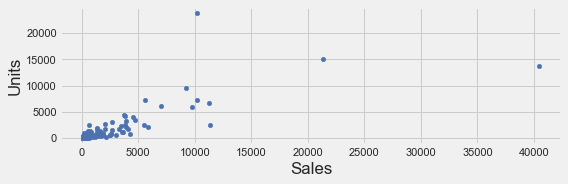

In [71]:
rdd_df = practice_data.assign(threshold=(practice_data['Sales'] > 0).astype(float))

plt.figure(figsize=(8,8))

for p, cause in enumerate(["Units", "Content", "Restaurant"], 1):
    ax = plt.subplot(3,1,p)
    practice_data.plot.scatter(x="Sales", y=cause, ax=ax)
    m = smf.regression.linear_model.WLS(f"{cause}~Sales*threshold", rdd_df).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    practice_data.assign(predictions=m.fittedvalues).plot(x="Sales", y="predictions", ax=ax, color="C1")
    plt.title(f"Impact of Alcohol on Death: {np.round(ate_pct, 2)}%")

plt.tight_layout()

In [3]:
def Visualizing_Data_At_Threshold (data, threshold, running_variable, outcome_variable):
    #set the running variable's threshold
    data[running_variable] -= threshold
    
    #visualize data with threshold
    plt.figure(figsize=(8,8))
    ax = plt.subplot(3,1,1)
    data.plot.scatter(x=running_variable, y=outcome_variable, ax=ax)
    plt.title("Running Variable (Centered at 0)")
    

In [56]:
def Restricting_Binning_Data(data, threshold, running_variable, outcome_variable):
    #restricting and binning the data
    optimal_bandwidth = rdd.optimal_bandwidth(data[outcome_variable], data[running_variable], cut=threshold)
    #bandwidth_opt = rdd.optimal_bandwidth(practice_data['Sales'], practice_data['Units'], cut=100)

    restricted_data = rdd.truncated_data(data, running_variable, optimal_bandwidth, cut=threshold)
    #data_rdd = rdd.truncated_data(practice_data, 'Units', bandwidth_opt, cut=100)

    ######data_binned = rdd.bin_data(restricted_data, outcome_variable, running_variable, 100)
    #data_binned = rdd.bin_data(data_rdd, 'Sales', 'Units', 10)

    #plt.figure(figsize=(12, 8))
    #plt.scatter(data_binned['Units'], data_binned['Sales'],
        #s = data_binned['n_obs'], facecolors='none', edgecolors='r')
    #plt.axvline(x=100, color='b')
    #plt.xlabel('x')
    #plt.ylabel('y')
    #plt.show()
    #plt.close()

    #y = sales
    #x = units
    
    #visualizing the restricted and binned data

    
    
    #plt.scatter(data_rdd['Units'], data_rdd['Sales'], facecolors='none', edgecolors='r')
    
    
    plt.figure(figsize=(12, 8))
    plt.scatter(restricted_data[running_variable], restricted_data[outcome_variable], facecolors='none', edgecolors='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axvline(x=100, color='b')
    plt.show()
    plt.close()
                
            


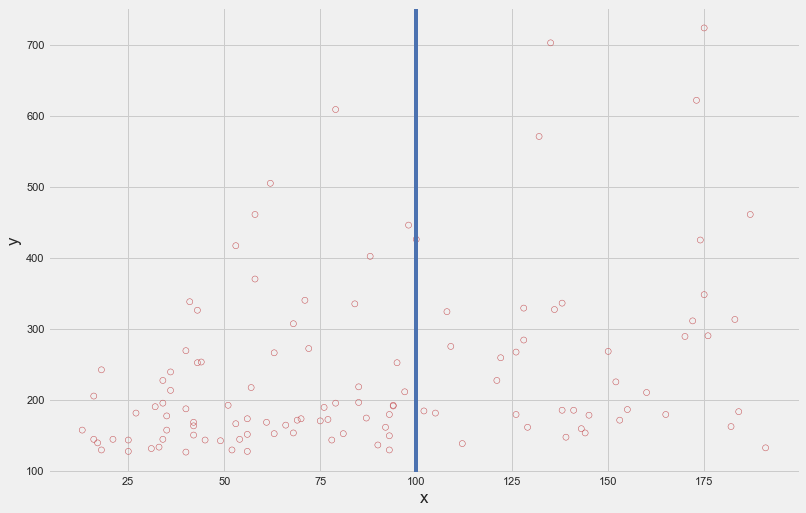

In [55]:
Restricting_Binning_Data(practice_data, 100, 'Units', 'Sales')

In [5]:
def Estimating_Effect (data, threshold, running_variable, outcome_variable):
    #creating a table that estimates the effect of the the treatment on the running variable at the threshold
    rdd_df = data.assign(threshold=(data[running_variable] > 0).astype(int))
    model = smf.wls("all~running_variable*threshold", rdd_df).fit()
    model.summary().tables[1]
    

In [6]:
def Graphing_Running_Variable(data, threshold, running_variable, outcome_variable): 
    #create a scatter plot of the running variable values 
    ax = data.plot.scatter(x=running_variable, y=outcome_variable, color="C0")
    data.assign(predictions=model.fittedvalues).plot(x=running_variable, y="predictions", ax=ax, color="C1")
    plt.title("Regression Discontinuity");
    

In [7]:
def Triangular_Kernel_Weighting(data, threshold, running_variable, outcome_variable): 
    #helper function that does triangular kernel weighting
    def kernel(R, c, h):
        indicator = (np.abs(R-c) <= h).astype(float)
        return indicator * (1 - np.abs(R-c)/h)
    
    #plotting the original data with triangular kernel weighting applied to it
    plt.plot(data[running_variable], kernel(data[running_variable], c=0, h=1))
    plt.xlabel(running_variable)
    plt.ylabel("Weight")
    plt.title("Kernel Weight by Running Variable");
    
    

In [8]:
def Estimating_Effects_With_Kernel(data, threshold, running_variable, outcome_variable): 
    model = smf.wls("all~running_variable*threshold", rdd_df,
                weights=kernel(data[running_variable], c=0, h=1)).fit()

    model.summary().tables[1]

In [9]:
def Sheepskin_Effect(data, threshold, running_variable, outcome_variable): 
    data.plot.scatter(x=running_variable, y=outcome_variable, figsize=(10,5))
    plt.xlabel("Running Variable")
    plt.ylabel("Outcome Variable")


In [10]:
def McCray_Test(data, threshold, running_variable, outcome_variable): 
    plt.figure(figsize=(8,8))
    data['n'] = data[running_variable].value_counts
    ax = plt.subplot(2,1,1)
    data.plot.bar(x=running_variable, y="n", ax=ax)
    plt.title("McCrary Test")
    plt.ylabel("Smoothness at the Threshold")

    ax = plt.subplot(2,1,2, sharex=ax)
    data.replace({1877:1977, 1874:2277}).plot.bar(x=running_variable, y="n", ax=ax)
    plt.xlabel("Running Variable Relative to Cut off")
    plt.ylabel("Spike at the Threshold");